In [43]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [44]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [45]:
x_train.shape

(60000, 28, 28)

In [46]:
x_test.shape

(10000, 28, 28)

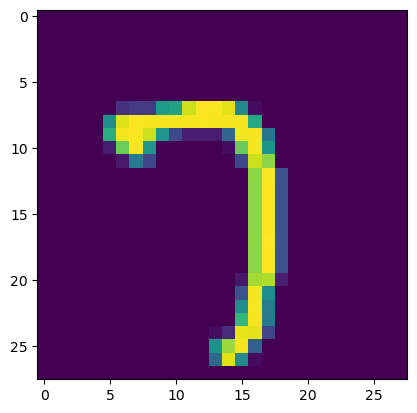

In [47]:
import matplotlib.pyplot as plt
plt.imshow(x_test[2700]) 

In [48]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [49]:
# data parameters
num_classes = 10

In [50]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [51]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [52]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [53]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [54]:
# Model / data parameters
input_shape = (28, 28, 1)

In [55]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),  ## Experiment with removing the Dropout function
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [56]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [57]:
batch_size = 128
epochs = 2

In [58]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
422/422 [==============================] - 25s 53ms/step - loss: 0.3587 - accuracy: 0.8907 - val_loss: 0.0815 - val_accuracy: 0.9787
Epoch 2/2
422/422 [==============================] - 22s 52ms/step - loss: 0.1112 - accuracy: 0.9661 - val_loss: 0.0550 - val_accuracy: 0.9845


In [59]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.057633381336927414
Test accuracy: 0.9814000129699707


In [60]:
x_test[999].shape

(28, 28, 1)

In [61]:
test_img = x_test[999]

In [62]:
test_img.shape

(28, 28, 1)

In [63]:
test_img_new = test_img[:, :, 0]

In [64]:
test_img_new.shape

(28, 28)

In [65]:
#test_img

In [66]:
import matplotlib.pyplot as plt

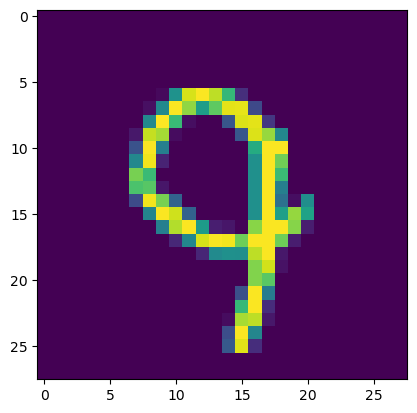

In [67]:
plt.imshow(test_img_new)

In [68]:
x_test.shape

(10000, 28, 28, 1)

In [69]:
np.array(x_test[0]).shape

(28, 28, 1)

In [70]:
preds = model.predict(np.array([x_test[999]]))

1/1 [==============================] - 0s 108ms/step


In [71]:
preds.shape

(1, 10)

In [72]:
preds[0]

array([5.4123288e-05, 5.3159210e-09, 4.4382232e-05, 5.5787797e-05,
       7.4850721e-03, 1.6397821e-04, 1.0368031e-07, 4.4227950e-03,
       7.0010853e-04, 9.8707366e-01], dtype=float32)

In [73]:
classes = np.argmax(preds, axis = 1)
print(classes)

[9]


In [74]:
!pip install netron

In [75]:
model_name = 'mnist_keras.h5'

In [76]:
model.save(model_name)

In [77]:
import netron as nt

In [78]:
nt.start(model_name, 8081)

Stopping http://localhost:8081
Serving 'mnist_keras.h5' at http://localhost:8081


('localhost', 8081)